# Final Model

## Importing Necessary Dependencies

In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math


#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset
from dataPrep import visual_charts, visualize_dataset
from dataPrep import prep_dataset

from finalModelUtils import relu, relu_grad, softmax

np.random.seed(1)
%matplotlib inline

## Dataset Preparation

#### Loading Complete Dataset

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

print("Data\t\t\t","Datatype\t\t","Shape")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Dev Set Images:\t\t" + str(type(dev_x_orig))+"\t",str(dev_x_orig.shape))
print("Dev Set Labels:\t\t" + str(type(dev_y_orig))+"\t",str(dev_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")


Data			 Datatype		 Shape
Training Set Images:	<class 'numpy.ndarray'>	 (60000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (60000, 1)
Dev Set Images:		<class 'numpy.ndarray'>	 (5000, 28, 28)
Dev Set Labels:		<class 'numpy.ndarray'>	 (5000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (5000, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (5000, 1)


#### Preparing the Dataset (Flattening and Normalizing)

In [3]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig)

print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_orig.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_orig.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_orig.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_orig.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(10, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(10, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(10, 5000)


#### Visualizing the dataset

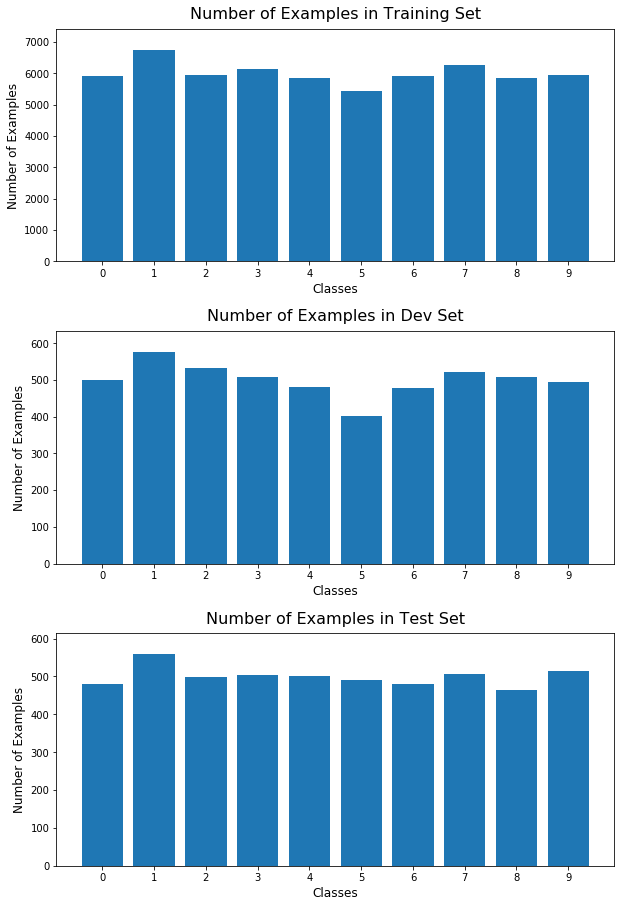

In [4]:
visual_charts(train_y_orig, dev_y_orig, test_y_orig)

#### Creating Minibatches

In [5]:
def rand_mini_batches(X, Y, mini_batch_size = 64, seed=1):
   
    
    np.random.seed(seed)            
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
#     Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))

#     Partition (shuffled_X, shuffled_Y) except for the last batch
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Last batch (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [6]:
mini_batches = rand_mini_batches(train_x_norm,train_y_encoded, mini_batch_size = 512)
minibatch_length = len(mini_batches)
print("Total Minibatches:\t"+str(minibatch_length))
print("\nMinibatchs\t\tShape")
print("==================================")
print ("1st mini_batch_X:\t" + str(mini_batches[0][0].shape))
print ("2nd mini_batch_X:\t" + str(mini_batches[1][0].shape))
print (str(minibatch_length - 1) + "th mini_batch_X:\t" + str(mini_batches[-2][0].shape))
print (str(minibatch_length) + "th mini_batch_X:\t" + str(mini_batches[-1][0].shape))

print ("\n1st mini_batch_Y:\t" + str(mini_batches[0][1].shape))
print ("2nd mini_batch_Y:\t" + str(mini_batches[1][1].shape)) 
print (str(minibatch_length - 1) + "th mini_batch_Y:\t" + str(mini_batches[-2][1].shape))
print (str(minibatch_length) + "th mini_batch_Y:\t" + str(mini_batches[-1][1].shape))


Total Minibatches:	118

Minibatchs		Shape
1st mini_batch_X:	(784, 512)
2nd mini_batch_X:	(784, 512)
117th mini_batch_X:	(784, 512)
118th mini_batch_X:	(784, 96)

1st mini_batch_Y:	(10, 512)
2nd mini_batch_Y:	(10, 512)
117th mini_batch_Y:	(10, 512)
118th mini_batch_Y:	(10, 96)


#### Learning rate decay

In [ ]:
def decay_learning_rate(alpha_prev, epoch, decay_rate = 1 ):
    
    alpha = (1/(1 + decay_rate * epoch)) * alpha_prev
    
    return alpha

## Deep Learning Model

### 1. Creating NN Architecture

#### initializing layers

In [88]:
def init_layers():
    layers_dim = [784,800,300,10]
    return layers_dim

#### Initializing Parameters

- Random initialization

In [8]:
def init_params_random(layers_dim):
    
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) *0.01
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

- He-initialization

In [9]:
def init_params_he(layers_dim):
    
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) * np.sqrt(np.divide(2,layers_dim[l-1])) # He - initialization
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

#### Initializing Hyper Parameters

In [10]:
def init_hyperParams(alpha = 0.001, num_epoch = 2000, mini_batch_size = 128, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8,lambd = 0,keep_probs = [0.9,0.8]):
    hyperParams = {}
    hyperParams['learning_rate'] = alpha
    hyperParams['num_epoch'] = num_epoch
    hyperParams['mini_batch_size'] = mini_batch_size
    hyperParams['beta1'] = beta1
    hyperParams['beta2'] = beta2
    hyperParams['epsilon'] = epsilon
    hyperParams['lambda'] = lambd
    hyperParams['keep_probs'] = keep_probs
    
    return hyperParams

### 2. Forward Propogation

#### Calculating sum of product of inputs and weights (Z) for individual layer

In [11]:
def forward_sum(A,W,b):
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    assert(Z.shape == (W.shape[0],Z.shape[1]))
    
    return Z, cache

#### Calculating Activation for individual Layer

In [12]:
def forward_activation(A,W,b,activation):
    
    if activation == 'relu':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = relu(Z)
        
    if activation == 'softmax':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = softmax(Z)
    
    cache = (sum_cache,activation_cache)
    assert(A.shape == Z.shape)
    
    return A, cache

#### Complete Forward Propagation for L layers

In [13]:
def forward_prop(X,parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation='relu')
        caches.append(cache)

    AL, cache = forward_activation(A,parameters['W' + str(L)],parameters['b' + str(L)],activation='softmax')
    caches.append(cache)
    
    assert(AL.shape == (10,X.shape[1]))
    
    return AL,caches
    

forward prop with dropout

In [14]:
def forward_dropout(A,keep_probs):
     #implementing dropout
    D = np.random.rand(A.shape[0],A.shape[1])
    D = (D < keep_probs).astype(int)
    A = np.multiply(A,D)
    A = np.divide(A,keep_probs)
    
    dropout_mask = D
    return A,dropout_mask

In [15]:
def forward_prop_with_dropout(X,parameters,keep_probs):
    caches = []
    dropout_masks = []
    A = X
    L = len(parameters) // 2
    
    assert(len(keep_probs) == L-1) # no dropouts in the Output layer
    
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], activation='relu')
        caches.append(cache)
        A , dropout_mask = forward_dropout(A,keep_probs[l-1])
        dropout_masks.append(dropout_mask)

    AL, cache = forward_activation(A,parameters['W' + str(L)],parameters['b' + str(L)], activation='softmax')
    caches.append(cache)
    
    assert(AL.shape == (10,X.shape[1]))
    
    return AL,caches,dropout_masks
    

### 3. Cost Function

In [16]:
def compute_cost(AL,Y):
    m = Y.shape[1]

    cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
    
    
    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    assert(cost.shape == ())
    
    return cost

Computing Cost with L2 regularization

In [17]:
def compute_cost_with_l2(AL,Y,caches,lambd):
    L = len(caches)
    m = Y.shape[1]
    
    cross_entropy_cost = compute_cost(AL,Y)
    
    norm = 0
    for l in range(L):
        current_cache = caches[l]
        sum_cache, _ = current_cache
        _,W,_ = sum_cache
        norm += np.sum(np.square(W))
    
    
    L2_cost = (lambd/(2*m)) * norm 
    cost = cross_entropy_cost + L2_cost

    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    assert(cost.shape == ())
    
    return cost

### 4. Backward Propagation

#### Calculating Gradients for individual Layer

In [18]:
def backward_grad(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    
    return dA_prev, dW, db

In [19]:
def backward_grad_with_l2(dZ,cache,lambd):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ,A_prev.T) + np.multiply(np.divide(lambd,m),W )
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    
    return dA_prev, dW, db

#### Calculating Backward Activation for individual layer

In [20]:
def backward_activation(dA,cache,activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad(dZ, sum_cache)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad(dA, sum_cache)
    
    return dA_prev, dW, db
    
    

In [21]:
def backward_activation_with_l2(dA,cache,lambd,activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad_with_l2(dZ, sum_cache,lambd)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad_with_l2(dA, sum_cache,lambd)
    
    return dA_prev, dW, db
    
    

#### Complete Backward Propagation for L layers

In [22]:
def backward_prop(AL, Y,caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_activation(grads["dA" + str(l + 1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

Back Prop with L2 Regularization

In [23]:
def backward_prop_with_l2(AL, Y,caches,lambd):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation_with_l2(dA, current_cache,lambd, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_activation_with_l2(grads["dA" + str(l + 1)], current_cache,lambd, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

backprop with dropout

In [24]:
def backward_dropout(dA_prev_temp, D, keep_prob):
    dA_prev = np.multiply(dA_prev_temp,D)
    dA_prev = np.divide(dA_prev,keep_prob)
    return dA_prev

In [25]:
def backward_prop_with_dropout(AL, Y,caches,dropout_masks,keep_probs):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        #implementing dropout
        D = dropout_masks[l]
        current_cache = caches[l]
        
        dA_prev_temp = backward_dropout(grads["dA" + str(l + 1)], D, keep_probs[l])
        dA_prev, dW_temp, db_temp = backward_activation(dA_prev_temp, current_cache, activation = 'relu')
        
        
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### 5. Update Parameters

- normal update of parameters

In [26]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
    return parameters

- update parameters with adam

In [27]:
#initialize adam

def initialize_adam(parameters) :
   
    L = len(parameters) // 2 
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return v, s

In [28]:
#update with adam
def update_parameters_adam(parameters, grads, learning_rate, v, s, t , beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
       
    L = len(parameters) // 2           
    v_corrected = {}                         
    s_corrected = {}                       
    
    for l in range(L):
        # Moving average of the gradients.
        v["dW" + str(l+1)] = np.add(beta1 * v["dW" + str(l+1)], (1 - beta1) * grads["dW" + str(l+1)])
        v["db" + str(l+1)] = np.add(beta1 * v["db" + str(l+1)], (1 - beta1) * grads["db" + str(l+1)])

        # Compute bias-corrected first moment estimate.
        v_corrected["dW" + str(l+1)] = np.divide(v["dW" + str(l+1)], (1 - np.power(beta1,t)))
        v_corrected["db" + str(l+1)] = np.divide(v["db" + str(l+1)], (1 - np.power(beta1,t)))

        # Moving average of the squared gradients. 
        s["dW" + str(l+1)] = np.add(beta2 * s["dW" + str(l+1)], (1 - beta2) * np.square(grads["dW" + str(l+1)]))
        s["db" + str(l+1)] = np.add(beta2 * s["db" + str(l+1)], (1 - beta2) * np.square(grads["db" + str(l+1)]))

        # Compute bias-corrected second raw moment estimate. 
        s_corrected["dW" + str(l+1)] = np.divide(s["dW" + str(l+1)], (1 - np.power(beta2,t)))
        s_corrected["db" + str(l+1)] = np.divide(s["db" + str(l+1)], (1 - np.power(beta2,t)))

        # Update parameters. 
        parameters["W" + str(l+1)] = np.subtract(parameters["W" + str(l+1)],  learning_rate * np.divide(v_corrected["dW" + str(l+1)], np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
        parameters["b" + str(l+1)] = np.subtract(parameters["b" + str(l+1)],  learning_rate * np.divide(v_corrected["db" + str(l+1)], np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))

    return parameters, v, s

### 6.  Prediction 

In [29]:
def predict(X,y,parameters):
    m = y.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    probas, _ = forward_prop(X, parameters)
   
    assert(probas.shape == y.shape)
        
    predicted_labels = np.argmax(probas,axis=0).reshape(1,probas.shape[1])
    predicted_prob = np.max(probas,axis = 0).reshape(1,m)
    
    Y = np.argmax(y,axis=0).reshape(1,y.shape[1])
    

    #print results
    true_prediction = np.equal(predicted_labels,Y)
    
    num_correct_labels = np.sum(true_prediction)
    accuracy = (num_correct_labels/m)
        
    return predicted_labels, predicted_prob, accuracy


#### Visualizing the costs and accuracy for model analysis

In [30]:
def visualize_results(attr, attr_type):
    
    plt.plot(np.squeeze(attr))
    if attr_type == 'costs':
        plt.ylabel("cost")
        plt.title("Cost")
        
    elif attr_type == 'train_accs':
        plt.ylabel("accuracy")
        plt.title("Training Accuracy")
#         plt.plot(np.squeeze(1 - attr), label = 'loss')
        
        
    elif attr_type == 'val_accs':
        plt.ylabel("accuracy")
        plt.title("Validation Accuracy")
#         plt.plot(np.squeeze(1 - attr), label = 'loss')
        
        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
    plt.xlabel('Epochs (per hundreds)')
    plt.show()

### 7. Train Model

In [92]:
def train(X_train, Y_train, X_dev, Y_dev, layers_dim, hyperParams, optimizer = 'adam',regularizer = 'l2' ):
    #hyper parameters
    learning_rate = hyperParams['learning_rate']
    num_epoch = hyperParams['num_epoch']
    beta1 = hyperParams['beta1']
    beta2 = hyperParams['beta2']
    epsilon = hyperParams['epsilon']
    lambd = hyperParams['lambda']
    keep_probs = hyperParams['keep_probs']
           
    
    seed = 1
    m = Y_train.shape[1]
    costs = []      # keep track of epoch cost    
    train_accs = []  # keep track of training accuracy
    val_accs = []     # keep track of Validation accuracy
    
    if optimizer == 'sgd':
        mini_batch_size = 1
    elif optimizer == 'bgd':
        mini_batch_size = m
    else:
        mini_batch_size = hyperParams['mini_batch_size']
        
    
    parameters = init_params_he(layers_dim)
    
    if optimizer == 'mgd' or optimizer == 'sgd' or optimizer == 'bgd':
        pass
    elif optimizer == 'adam':
        t = 0
        v,s = initialize_adam(parameters)
    
    #minibatch GD
    for i in range(0, num_epoch):
        seed += 1
        minibatches = rand_mini_batches(X_train, Y_train, mini_batch_size, seed)
        epoch_cost = 0
        toc = time.time() # for calculating epoch time
        
#         #learning rate decay after certain epoch
#         if i % 5 == 0:
#             learning_rate = decay_learning_rate(learning_rate, i , decay_rate = 0.1)
        
        for minibatch in minibatches:
            #retriving minibatch of X and Y from training set
            (minibatch_X, minibatch_Y) = minibatch
            
            #forward Propagation
            if regularizer == 'dropout':
                AL, caches,dropout_masks = forward_prop_with_dropout(minibatch_X,parameters,keep_probs)
            else:
                AL, caches = forward_prop(minibatch_X, parameters)
            
            #Computing Cost
            #if lambda > 0 then applying L2 regularization
            if regularizer == 'l2':
                epoch_cost += compute_cost_with_l2(AL, minibatch_Y,caches,lambd) #accumulating the batch costs
            else:
                epoch_cost += compute_cost(AL, minibatch_Y) #accumulating the batch costs
                
            #Backward Propagation
            if regularizer == 'l2':
                grads = backward_prop_with_l2(AL, minibatch_Y, caches,lambd)
            elif regularizer == 'dropout':
                grads = backward_prop_with_dropout(AL, minibatch_Y, caches,dropout_masks, keep_probs)
            else:
                grads = backward_prop(AL, minibatch_Y, caches)
                
            #Updating parameters
            if optimizer == 'adam':
                t = t+1
                parameters, v, s = update_parameters_adam(parameters, grads,learning_rate, v, s,t, beta1, beta2,  epsilon)      
            else:
                parameters = update_parameters(parameters, grads, learning_rate)
                
        epoch_cost_avg = epoch_cost / m
        costs.append(epoch_cost_avg)
        
        #computing and accumulating training and validation accuracy
        _,_,train_acc = predict(X_train, Y_train, parameters)
        _,_,val_acc= predict(X_dev, Y_dev, parameters)  
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        tic = time.time()  # for calculating epoch time
        epoch_time = 1000*(tic-toc)

#         if i % 50 == 0:
        print("\nEpoch: %d == Learning rate: %f || Time Taken: %f ms"%(i,learning_rate,epoch_time))   
        print ("\t== Cost: %f || Training acc: %.6f || Val acc: %.6f || Val loss: %.6f"%(epoch_cost_avg,train_acc,val_acc,1-val_acc))
#         if i % 100 == 0:
            
            
            
    visualize_results(costs, attr_type='costs') 
    
    visualize_results(train_accs, attr_type='train_accs')       
    visualize_results(val_accs, attr_type='val_accs')       
    
    return parameters

### Running Model


Epoch: 0 == Learning rate: 0.000100 || Time Taken: 12280.660629 ms
	== Cost: 0.004480 || Training acc: 0.931733 || Val acc: 0.935200 || Val loss: 0.064800

Epoch: 1 == Learning rate: 0.000100 || Time Taken: 12830.611706 ms
	== Cost: 0.001928 || Training acc: 0.950817 || Val acc: 0.951800 || Val loss: 0.048200

Epoch: 2 == Learning rate: 0.000100 || Time Taken: 13086.469173 ms
	== Cost: 0.001447 || Training acc: 0.962467 || Val acc: 0.959600 || Val loss: 0.040400

Epoch: 3 == Learning rate: 0.000100 || Time Taken: 13059.069157 ms
	== Cost: 0.001165 || Training acc: 0.969150 || Val acc: 0.963800 || Val loss: 0.036200

Epoch: 4 == Learning rate: 0.000100 || Time Taken: 13431.997299 ms
	== Cost: 0.000980 || Training acc: 0.975100 || Val acc: 0.969600 || Val loss: 0.030400

Epoch: 5 == Learning rate: 0.000100 || Time Taken: 13081.924915 ms
	== Cost: 0.000840 || Training acc: 0.978683 || Val acc: 0.972600 || Val loss: 0.027400

Epoch: 6 == Learning rate: 0.000100 || Time Taken: 13043.521404

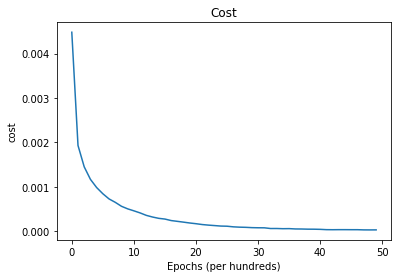

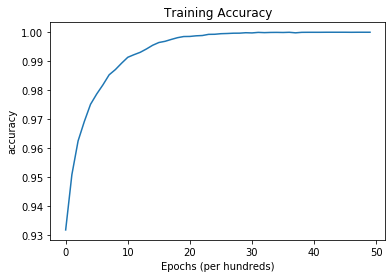

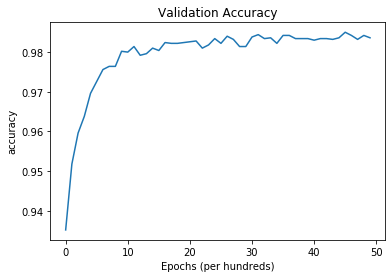

In [93]:
hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 50, mini_batch_size = 128,lambd = 0.7,keep_probs = [0.8,0.8])
layers_dim = init_layers()
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, optimizer = 'adam',regularizer = 'dropout')

In [94]:
predicted_labels_train, prediction_prob_train,train_acc = predict(train_x_norm, train_y_encoded,parameters)
print("\nAccuracy: "  + str(train_acc))
print("\nError:\t"+str(1-train_acc))


Accuracy: 1.0

Error:	0.0


In [95]:
predicted_labels_dev, prediction_prob_prob,dev_acc = predict(dev_x_norm, dev_y_encoded,parameters)
print("\nAccuracy: "  + str(dev_acc))
print("\nError:\t"+str(1-dev_acc))


Accuracy: 0.9836

Error:	0.01639999999999997


In [96]:
predicted_labels_test, prediction_prob_prob,test_acc = predict(test_x_norm, test_y_encoded,parameters)
print("\nAccuracy: "  + str(test_acc))
print("\nError:\t"+str(1-test_acc))


Accuracy: 0.9852

Error:	0.014800000000000035


### Confusion Matrix

In [97]:
def confusion_matrix(y_orig,y_predicted):
    m = y_orig.shape[0]
    k = len(np.unique(y_orig)) # or simply take k =10
    
    cm = np.zeros((k,k))

    for i in range(m):
        cm[y_orig[i],y_predicted[i]] += 1
   
    return cm.astype(int)

In [98]:
cm_train = confusion_matrix(train_y_orig,predicted_labels_train.T)
print("\nConfusion Matrix for Training set:\n")
print(cm_train)

cm_dev = confusion_matrix(dev_y_orig,predicted_labels_dev.T)
print("\nConfusion Matrix for Dev set:\n")
print(cm_dev)

cm_test = confusion_matrix(test_y_orig,predicted_labels_test.T)
print("\nConfusion Matrix for Test set:\n")
print(cm_test)


Confusion Matrix for Training set:

[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]

Confusion Matrix for Dev set:

[[493   0   0   0   0   1   1   0   2   2]
 [  0 571   3   0   0   0   1   0   1   0]
 [  2   0 521   1   1   0   1   3   4   0]
 [  0   0   2 501   0   2   0   1   0   1]
 [  0   0   2   1 470   0   1   0   2   6]
 [  0   0   0   4   1 393   1   1   0   1]
 [  1   0   0   0   0   2 474   0   0   0]
 [  1   0   4   1   0   0   0 510   2   4]
 [  0   0   1   2   0   1   1   2 499   3]
 [  0   0   0

In [99]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))
    im = plt.imshow(cm,cmap="GnBu") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu


    fig.colorbar(im,ax=ax,fraction=0.045)
    # ax.set_aspect('auto')

    ax.set_title("Confusion Matrix",fontsize=24,pad = 20)
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    ax.set_xlabel("Predicted", fontsize = 20)
    ax.set_ylabel("Expexted", fontsize = 20)

    ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)
    ax.set_yticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)

    #setting horizontal axes labeling to top.
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')


    # Turn off all the ticks
    ax.tick_params(top=False,left=False)


    thres = cm.max()//2

    for i in range(10):
        for j in range(10):
            per = cm[i,j]/cm.sum() * 100
            text = ax.text(j, i, "%d\n%.2f%%"%(cm[i, j], per),
                           ha="center", va="center", color="w" if cm[i,j] > thres else "black")


    fig.tight_layout()
    plt.show()


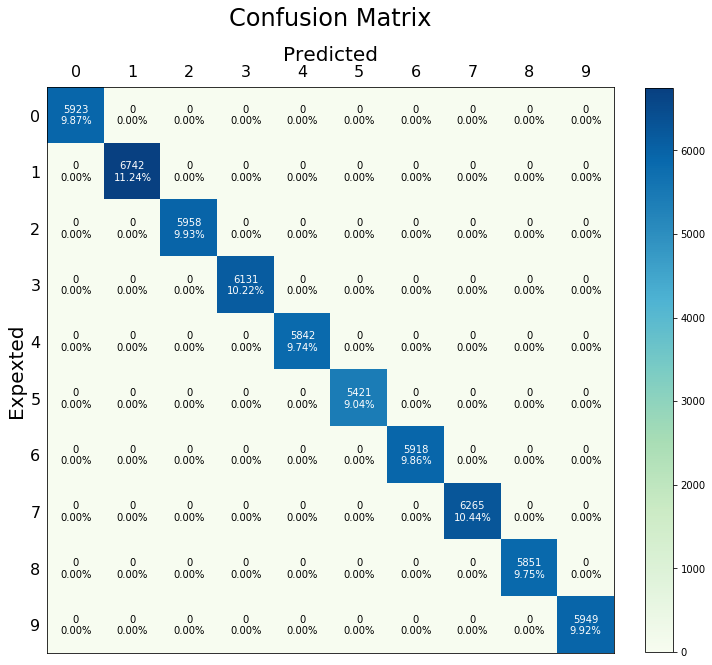

In [100]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train)

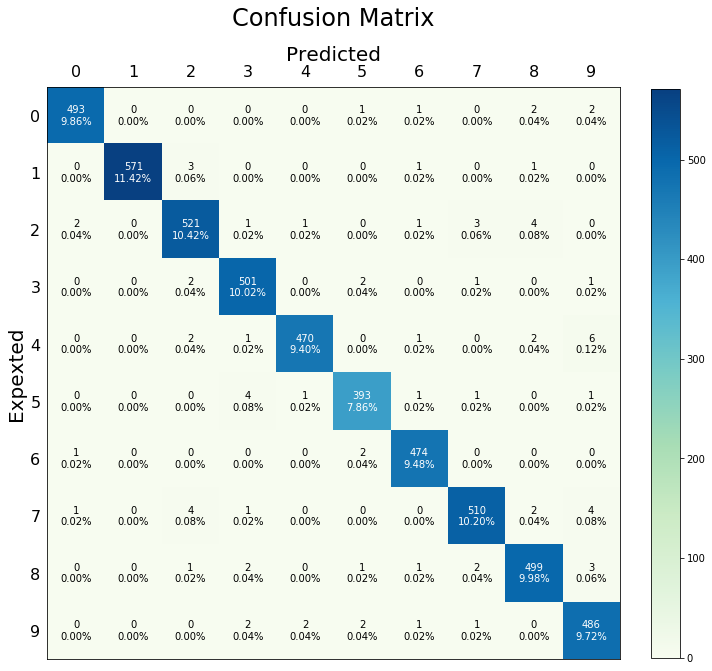

In [101]:
plot_confusion_matrix(cm_dev)

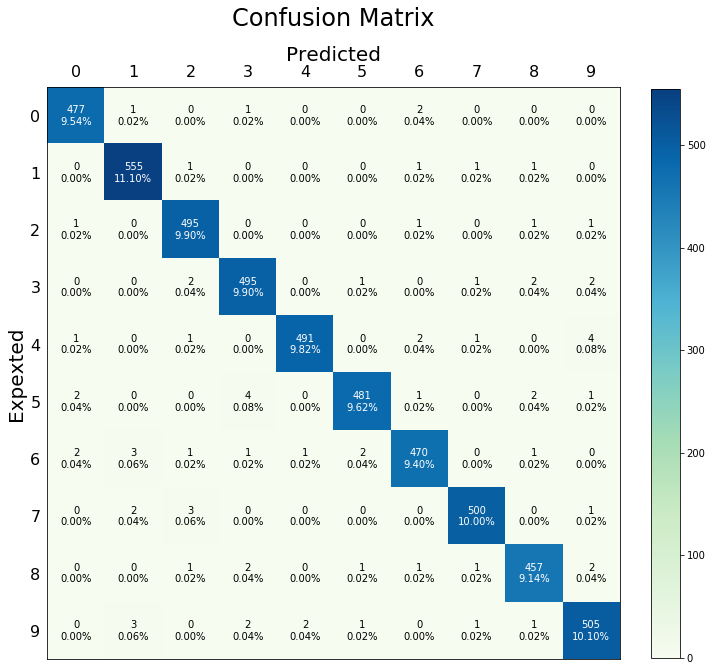

In [102]:
plot_confusion_matrix(cm_test)

In [103]:
def precision(label, cm):
    col = cm[:, label]
    prec = cm[label, label] / col.sum()
    return prec
    
def recall(label, cm):
    row = cm[label, :]
    rec = cm[label, label] / row.sum()
    return rec

def precision_average(prec):
    count = len(prec)    
    prec_mac_avg = np.sum(prec) / count
    return prec_mac_avg

def recall_average(rec):
    count = len(rec)
    rec_mac_avg = np.sum(rec) / count
    return rec_mac_avg

def accuracy(cm):
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    acc = diagonal_sum / sum_of_all_elements 
    return acc

def f1_score(prec,rec):
    f1 = (2 * prec * rec) / (prec + rec)
    return f1

def summary(cm):
    print("+=======+===============+===============+==========+")
    print("| Label\t| Precision \t| Recall \t| F1 Score |")
    print("+=======+===============+===============+==========+")
    prec = []
    rec = []
    f1 = []
    for label in range(10):
        prec.append(precision(label, cm))
        rec.append(recall(label, cm))
        f1.append(f1_score(prec[label], rec[label]))
        print("| %d \t|  %.3f \t|  %.3f \t|  %.3f   |"%(label, prec[label], rec[label], f1[label]))


    print("+=======+===============+===============+==========+") 
    avg_precision = precision_average(prec)
    avg_recall = recall_average(rec)
    acc = accuracy(cm)
    print("\nAvg Precision:\t"+ str(avg_precision) )
    print("Avg Recall:\t"+ str(avg_recall) )
    print("Accuracy:\t"+ str(acc))


In [104]:
summary(cm_train)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  1.000 	|  1.000 	|  1.000   |
| 1 	|  1.000 	|  1.000 	|  1.000   |
| 2 	|  1.000 	|  1.000 	|  1.000   |
| 3 	|  1.000 	|  1.000 	|  1.000   |
| 4 	|  1.000 	|  1.000 	|  1.000   |
| 5 	|  1.000 	|  1.000 	|  1.000   |
| 6 	|  1.000 	|  1.000 	|  1.000   |
| 7 	|  1.000 	|  1.000 	|  1.000   |
| 8 	|  1.000 	|  1.000 	|  1.000   |
| 9 	|  1.000 	|  1.000 	|  1.000   |
+=======+===============+===============+==========+

Avg Precision:	1.0
Avg Recall:	1.0
Accuracy:	1.0


In [105]:
summary(cm_dev)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.992 	|  0.988 	|  0.990   |
| 1 	|  1.000 	|  0.991 	|  0.996   |
| 2 	|  0.977 	|  0.977 	|  0.977   |
| 3 	|  0.979 	|  0.988 	|  0.983   |
| 4 	|  0.992 	|  0.975 	|  0.983   |
| 5 	|  0.980 	|  0.980 	|  0.980   |
| 6 	|  0.985 	|  0.994 	|  0.990   |
| 7 	|  0.985 	|  0.977 	|  0.981   |
| 8 	|  0.978 	|  0.980 	|  0.979   |
| 9 	|  0.966 	|  0.984 	|  0.975   |
+=======+===============+===============+==========+

Avg Precision:	0.9834201446565519
Avg Recall:	0.983498210394919
Accuracy:	0.9836


In [106]:
summary(cm_test)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.988 	|  0.992 	|  0.990   |
| 1 	|  0.984 	|  0.993 	|  0.988   |
| 2 	|  0.982 	|  0.992 	|  0.987   |
| 3 	|  0.980 	|  0.984 	|  0.982   |
| 4 	|  0.994 	|  0.982 	|  0.988   |
| 5 	|  0.990 	|  0.980 	|  0.985   |
| 6 	|  0.983 	|  0.977 	|  0.980   |
| 7 	|  0.990 	|  0.988 	|  0.989   |
| 8 	|  0.983 	|  0.983 	|  0.983   |
| 9 	|  0.979 	|  0.981 	|  0.980   |
+=======+===============+===============+==========+

Avg Precision:	0.9852440607245047
Avg Recall:	0.9850892646032307
Accuracy:	0.9852


#### Visualizating  Prediction

In [78]:
def visualize_prediction(x_orig, y_orig, predicted_labels, prediction_prob, dataset):
    if(dataset == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(30,40)
    elif(dataset == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(110,120)
    elif(dataset == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(110,120)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap='Greys')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

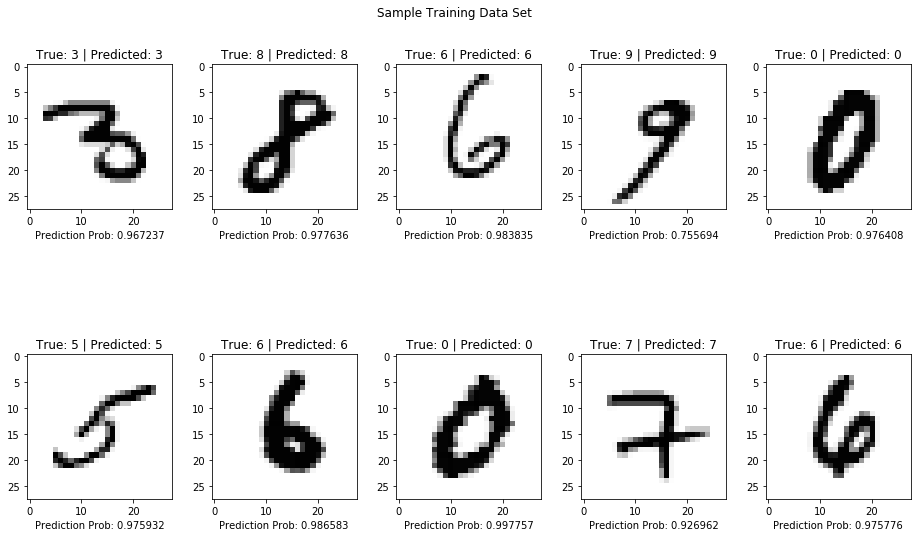

In [79]:
visualize_prediction(train_x_orig, train_y_orig.T,predicted_labels_train, prediction_prob_train,dataset = "training")

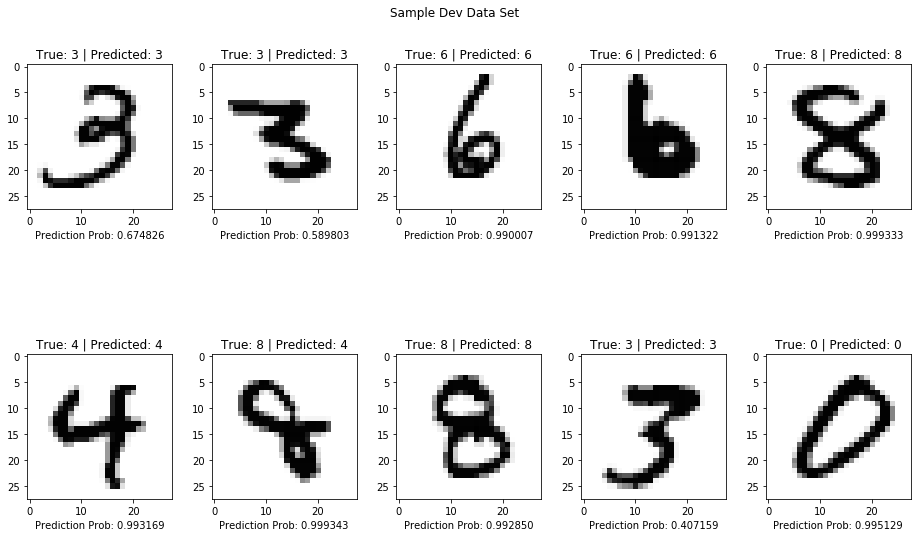

In [80]:
visualize_prediction(dev_x_orig, dev_y_orig.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

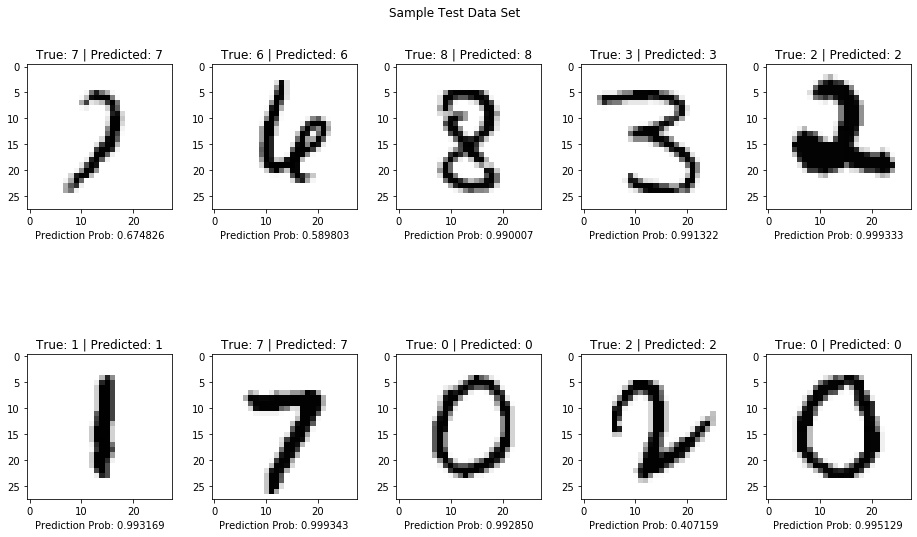

In [81]:
visualize_prediction(test_x_orig, test_y_orig.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

#### Visualizing Mislabelled Images in all datasets

In [82]:
def visualize_mislabelled_images(x_orig,y_orig,predicted_labels,prediction_prob,dataset):
    true_prediction = np.equal(predicted_labels,y_orig)
    mislabelled_indices = np.asarray(np.where(true_prediction == False))
    print("Total Mislabelled Images: "+str(len(mislabelled_indices[0])))
    
    if(dataset == "training"):
        visual_title = "Sample Mislabelled Training Images"
    elif(dataset == "dev"):
        visual_title = "Sample Mislabelled Dev Images"
    elif(dataset == "test"):
        visual_title = "Sample Mislabelled Test Images"
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),mislabelled_indices[1]):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

Total Mislabelled Images: 2099


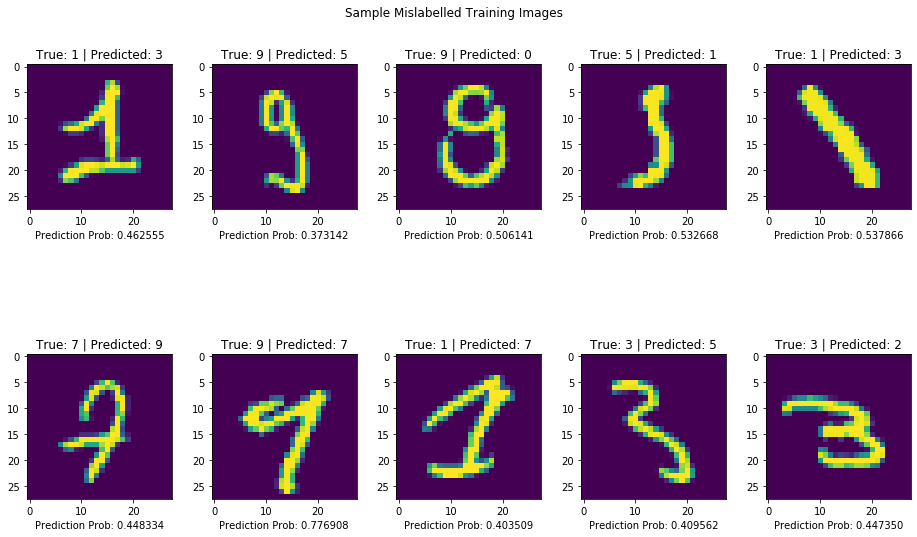

In [83]:
visualize_mislabelled_images(train_x_orig, train_y_orig.T,predicted_labels_train, prediction_prob_train,dataset = "training")

Total Mislabelled Images: 192


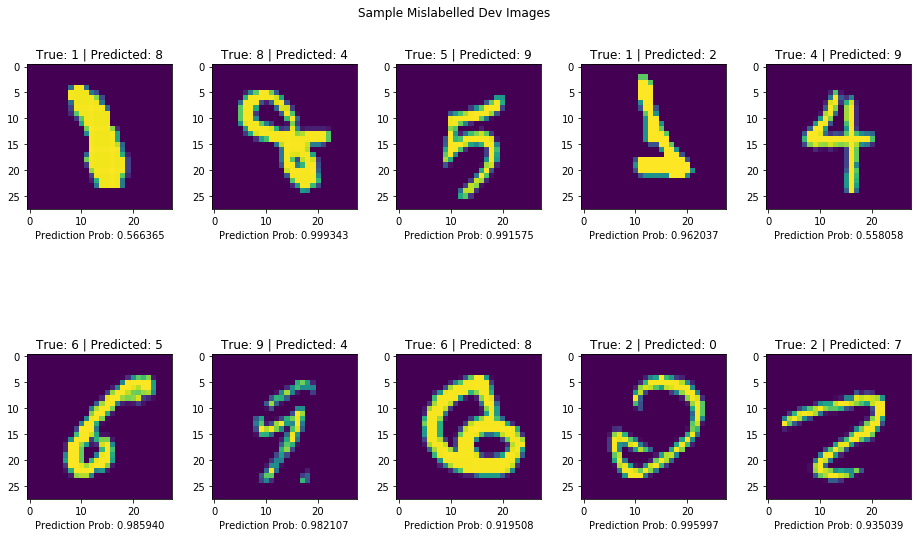

In [84]:
visualize_mislabelled_images(dev_x_orig, dev_y_orig.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

Total Mislabelled Images: 189


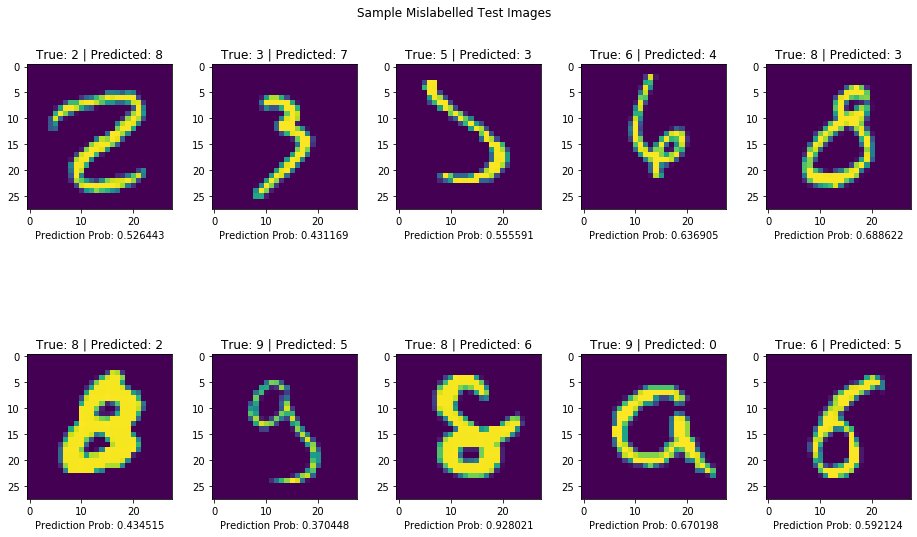

In [85]:
visualize_mislabelled_images(test_x_orig, test_y_orig.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

### Predicting Real Time images

In [86]:
from PIL import Image
from dataPrep import one_hot_encoding

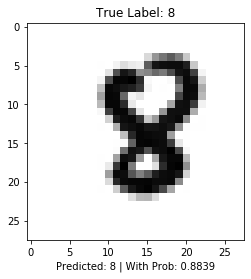

In [87]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

pridected_label,pred_prob,acc = predict(image_norm, label_encoded, parameters)

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("Predicted: %d | With Prob: %.4f"%(pridected_label.squeeze(), pred_prob.squeeze()))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')


In [ ]:
import pickle

def save_model(file_name, parameters):
    
        with open(file_name ,'wb') as output_file:
            pickle.dump(parameters,output_file)

In [ ]:
save_model(file_name = "base_model", parameters = parameters)

In [ ]:
def load_model(file_name):
    try: 
        with open(file_name ,'rb') as input_file:
            parameters = pickle.load(input_file)
        
        return parameters
    
    except(OSError, IOError) as e:
        print(e)

In [ ]:
loaded_params = load_model(file_name = "base_model")
print(type(loaded_params), type(parameters))